In [20]:
import pandas as pd
import time
import datetime
import numpy as np
import seaborn as sns

args = {'csvPath1' : './data/sami_starlink_satellites/satellites_v1.0_2022-05-19_22-13-54.csv',
'csvPath15' : './data/sami_starlink_satellites/satellites_v1.5_2022-05-19_22-11-20.csv',
}

#args = {'csvPath1' : './data/sami_starlink_satellites/satellites_v1.0_2022-06-03_02-41-18.csv',
#'csvPath15' : './data/sami_starlink_satellites/satellites_v1.5_2022-06-03_02-41-01.csv',
#}

In [30]:
csv_file_1 = pd.read_csv(args['csvPath1'])
csv_file_15 = pd.read_csv(args['csvPath15'])

In [11]:
print(csv_file_1.count())
print(csv_file_15.count())

Satellite           9130415
LATENCY             4951460
Az                  9130415
El                  9130415
Link                9130415
timestamp           9130415
connectable_sats    9130415
dtype: int64
Satellite           2024696
LATENCY             1117123
Az                  2024696
El                  2024696
Link                2024696
timestamp           2024696
connectable_sats    2024696
dtype: int64


In [31]:

# Add the version number for satellite
csv_file_1 = csv_file_1.assign(Satellite = csv_file_1['Satellite'].astype(str) + " V1.0")
csv_file_15 = csv_file_15.assign(Satellite = csv_file_15['Satellite'].astype(str) + " V1.5")
# Remove the "extra" number for timestamp
# csv_file_1 = csv_file_1.assign(timestamp = (csv_file_1['timestamp'] / 1000).astype(int))
# csv_file_15 = csv_file_15.assign(timestamp = (csv_file_15['timestamp'] / 1000).astype(int))
# Reset the index to 0

TIMESTAMP = 'timestamp'
csv_file_1[TIMESTAMP] = pd.to_datetime(csv_file_1[TIMESTAMP], unit='ms').dt.floor('s')
csv_file_15[TIMESTAMP] = pd.to_datetime(csv_file_15[TIMESTAMP], unit='ms').dt.floor('s')
csv_file_1 = csv_file_1.reset_index(drop=True)
csv_file_15 = csv_file_15.reset_index(drop=True)
csv_file_15 = csv_file_15[csv_file_15['LATENCY'].notna()]

concat_data = pd.concat([csv_file_1, csv_file_15], ignore_index=True).sort_values(by=['timestamp'])

In [32]:
concat_data

,Satellite,LATENCY,Az,El,Link,timestamp,connectable_sats
9130415,STARLINK-1640 V1.5,5.11,297,48,SERV,2022-05-20 05:11:21,10
9130424,STARLINK-2605 V1.5,5.35,307,31,SERV,2022-05-20 05:11:21,10
9130423,STARLINK-2641 V1.5,6.02,52,31,SERV,2022-05-20 05:11:21,10
9130422,STARLINK-2591 V1.5,5.04,302,49,SERV,2022-05-20 05:11:21,10
9130421,STARLINK-2299 V1.5,4.85,53,46,SERV,2022-05-20 05:11:21,10
...,...,...,...,...,...,...,...
9130401,STARLINK-1336 V1.0,5.25,275,47,SERV,2022-05-27 07:50:27,9
9130400,STARLINK-1231 V1.0,NaN,134,26,GSO,2022-05-27 07:50:27,9
9130414,STARLINK-2566 V1.0,4.70,334,60,SERV,2022-05-27 07:50:27,9
9130406,STARLINK-1579 V1.0,NaN,71,32,FOV,2022-05-27 07:50:27,9


In [33]:
# Groupby the data by timestamp and find the minimum latency
primary_link = concat_data.loc[concat_data.groupby(by=['timestamp'])['LATENCY'].idxmin()].reset_index(drop=True)

In [34]:
primary_link.to_csv("satellite_parimary_link_06-03.csv", index=False)

In [35]:
curr_primary_sate = primary_link['Satellite'][0]
timestamp = []
handover_from = []
handover_to = []
for _, row in primary_link.iterrows():
  if curr_primary_sate != row['Satellite']:
    timestamp.append(row['timestamp'])
    handover_from.append(curr_primary_sate)
    handover_to.append(row['Satellite'])
    curr_primary_sate = row['Satellite']

df = pd.DataFrame({'timestamp': timestamp,
    'Satellite handover from': handover_from,
    'Satellite handover to': handover_to})
df.to_csv("Satellite_handover_06-03.csv", index=False)

In [36]:
df

,timestamp,Satellite handover from,Satellite handover to
0,2022-05-20 05:11:33,STARLINK-1832 V1.5,STARLINK-3602 V1.5
1,2022-05-20 05:12:39,STARLINK-3602 V1.5,STARLINK-3522 V1.5
2,2022-05-20 05:13:24,STARLINK-3522 V1.5,STARLINK-3602 V1.5
3,2022-05-20 05:13:25,STARLINK-3602 V1.5,STARLINK-3522 V1.5
4,2022-05-20 05:13:34,STARLINK-3522 V1.5,STARLINK-3539 V1.5
...,...,...,...
39554,2022-05-27 07:49:26,STARLINK-2029 V1.0,STARLINK-2105 V1.0
39555,2022-05-27 07:49:37,STARLINK-2105 V1.0,STARLINK-3651 V1.5
39556,2022-05-27 07:49:38,STARLINK-3651 V1.5,STARLINK-2105 V1.0
39557,2022-05-27 07:50:09,STARLINK-2105 V1.0,STARLINK-2029 V1.0


In [37]:
primary_link

,Satellite,LATENCY,Az,El,Link,timestamp,connectable_sats
0,STARLINK-1832 V1.5,3.95,181,76,SERV,2022-05-20 05:11:21,10
1,STARLINK-3602 V1.5,5.36,304,31,SERV,2022-05-20 05:11:33,1
2,STARLINK-3602 V1.5,5.35,304,32,SERV,2022-05-20 05:11:34,1
3,STARLINK-3602 V1.5,5.33,304,32,SERV,2022-05-20 05:11:35,1
4,STARLINK-3602 V1.5,5.31,305,32,SERV,2022-05-20 05:11:36,1
...,...,...,...,...,...,...,...
614138,STARLINK-2105 V1.0,4.10,130,61,SERV,2022-05-27 07:50:23,9
614139,STARLINK-2105 V1.0,4.11,130,60,SERV,2022-05-27 07:50:24,9
614140,STARLINK-2105 V1.0,4.12,130,60,SERV,2022-05-27 07:50:25,9
614141,STARLINK-2105 V1.0,4.13,129,59,SERV,2022-05-27 07:50:26,9


In [14]:
df_b = pd.read_csv('Satellite_handover.csv')
df_b

,timestamp,Satellite handover from,Satellite handover to
0,1653023493678,STARLINK-1832 V1.5,STARLINK-3602 V1.5
1,1653023559689,STARLINK-3602 V1.5,STARLINK-3522 V1.5
2,1653023604696,STARLINK-3522 V1.5,STARLINK-3602 V1.5
3,1653023605697,STARLINK-3602 V1.5,STARLINK-3522 V1.5
4,1653023614698,STARLINK-3522 V1.5,STARLINK-3539 V1.5
...,...,...,...
942515,1653637793267,STARLINK-3651 V1.5,STARLINK-2105 V1.0
942516,1653637793496,STARLINK-2105 V1.0,STARLINK-3651 V1.5
942517,1653637794267,STARLINK-3651 V1.5,STARLINK-2105 V1.0
942518,1653637809270,STARLINK-2105 V1.0,STARLINK-2029 V1.0


In [2]:
df_prim = pd.read_csv('satellite_parimary_link')
df_prim['timestamp'] = pd.to_datetime(df_prim['timestamp'], unit='ms')
df_prim

,Satellite,LATENCY,Az,El,Link,timestamp,connectable_sats
0,STARLINK-1832 V1.5,3.95,181,76,SERV,2022-05-20 05:11:21.719,10
1,STARLINK-3602 V1.5,5.36,304,31,SERV,2022-05-20 05:11:33.678,1
2,STARLINK-3602 V1.5,5.35,304,32,SERV,2022-05-20 05:11:34.678,1
3,STARLINK-3602 V1.5,5.33,304,32,SERV,2022-05-20 05:11:35.678,1
4,STARLINK-3602 V1.5,5.31,305,32,SERV,2022-05-20 05:11:36.679,1
...,...,...,...,...,...,...,...
1086376,STARLINK-2105 V1.0,4.10,130,61,SERV,2022-05-27 07:50:23.273,9
1086377,STARLINK-2105 V1.0,4.11,130,60,SERV,2022-05-27 07:50:24.273,9
1086378,STARLINK-2105 V1.0,4.12,130,60,SERV,2022-05-27 07:50:25.273,9
1086379,STARLINK-2105 V1.0,4.13,129,59,SERV,2022-05-27 07:50:26.274,9


In [52]:
primary_link['connectable_sats'].mean()

7.809020049076518

In [39]:
df_tmp = df
df_tmp['t_shift'] = df_tmp['timestamp'].shift(1)
diff = df_tmp['timestamp'] - df_tmp['t_shift']

In [49]:
print(diff.mean())
print(diff.median())
print(diff.dt.total_seconds().quantile(.95))
print(diff.dt.total_seconds().quantile(.99))

0 days 00:00:15.529526265
0 days 00:00:10
51.0
75.0


/home/sami/.local/share/virtualenvs/starlink-plot-RhHgxjja/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

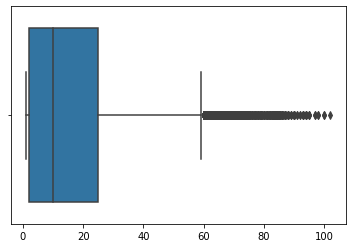

In [46]:
sns.boxplot(diff.dt.total_seconds(),)